<a href="https://colab.research.google.com/github/sukanya3970/CODSOFT/blob/main/new_task3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Churn_Modelling.csv")
df.head()

#dropping useless columns
# Check if the column names are correct and exist in the DataFrame
print(df.columns)  # Print the available columns in the DataFrame

# Correct the column names in the drop function if there are typos.
# For example, if the column name is 'customerid' instead of 'CustomerId':
# df.drop(columns=['surname', 'rownumber', 'customerid'], inplace=True)
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)  # Assuming column names are correct

df.info()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#One-hot encoding
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-7-47b3cc01c072>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region['Country'], y=region['Count'], palette='GnBu')


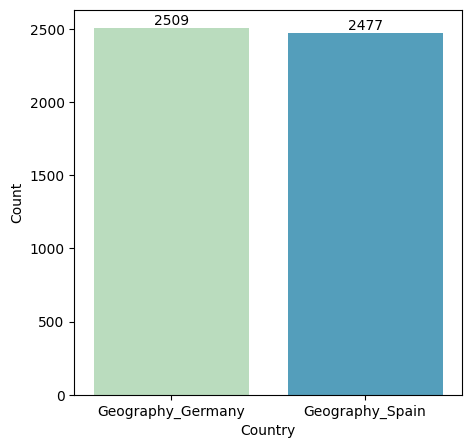

In [ ]:

# Instead of df.Geography, use the new one-hot encoded columns
region = df[['Geography_Germany', 'Geography_Spain']].sum().to_frame().reset_index()
region.columns = ['Country', 'Count']
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=region['Country'], y=region['Count'], palette='GnBu')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
x=df.drop(columns='Exited')
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

#Droping coulmn from the features
x=df.drop(columns='Exited')
y=df['Exited']

# Now you can use train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Droping coulmn from the features
x=df.drop(columns='Exited')
y=df['Exited']

# Now you can use train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(x_train,y_train)

1.0

In [ ]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score  # Import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.20%


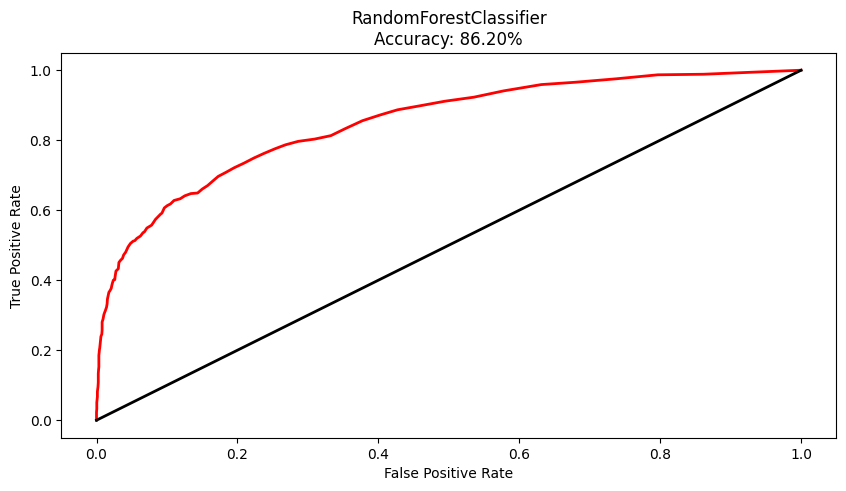

In [ ]:
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
Logistic Regression

In [34]:
#Model Score
model_score=model.score(x_train,y_train)
print(model_score)

0.874


In [ ]:
#Prediction
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.70%


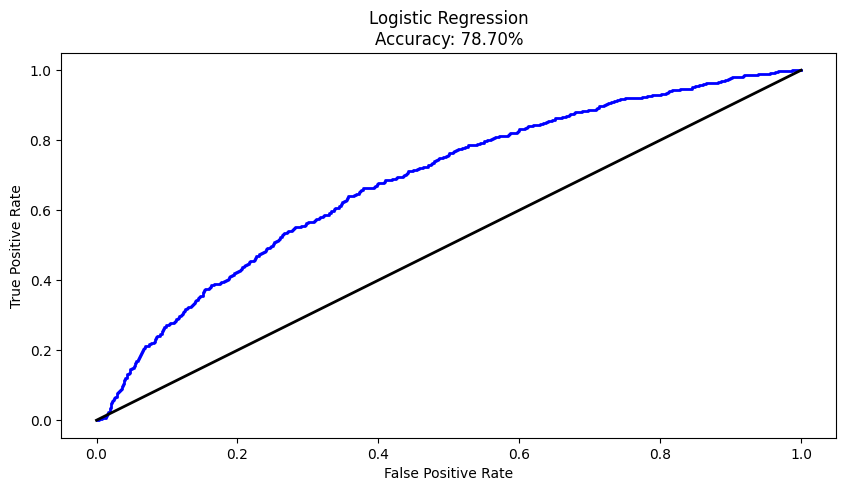

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
#Create Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Model Score
#Create Gradient Boosting model
#Model Score
model_score=model.score(x_train,y_train)
print(model_score)


0.874


In [ ]:
#Prediction
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 1]


In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.43%


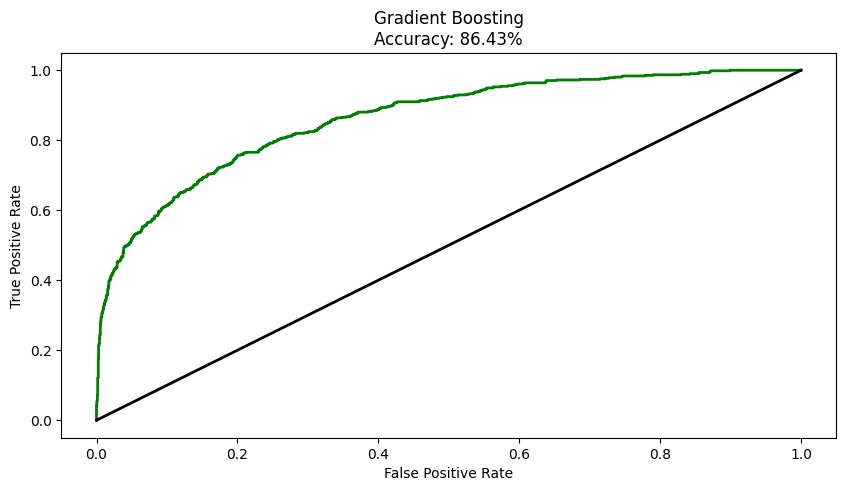

In [ ]:

y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]

In [ ]:
#Define lists to store accuracies
acc_list = []

In [35]:
#DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": acc_list})
model_results

,Model,Accuracy_Score
0,Random Forest,0.862333
1,Logistic Regression,0.787000
2,Gradient Boosting,0.864333


<Axes: xlabel='Model', ylabel='Accuracy_Score'>

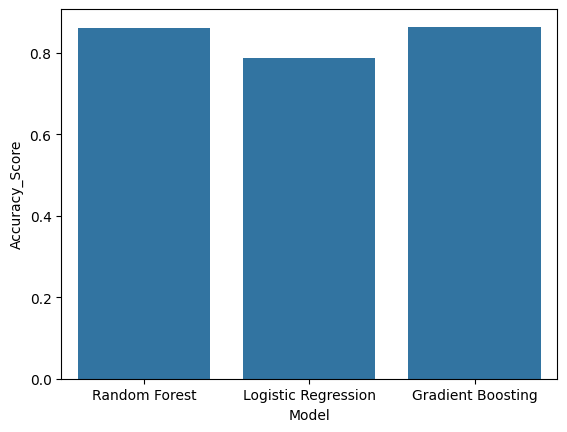

In [ ]:
sns.barplot(x="Model", y="Accuracy_Score", data=model_results)